In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
dp = pd.read_csv("data.csv")
dp.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
dp = dp.iloc[:,1:]
dp.head()
dp.shape

(7043, 20)

In [ ]:
pd.to_numeric(dp.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
dp = dp[dp.TotalCharges!=" "]
dp.shape

(7032, 20)

In [ ]:
dp.TotalCharges = pd.to_numeric(dp.TotalCharges,errors='coerce')
dp.dtypes
dp.shape

(7032, 20)

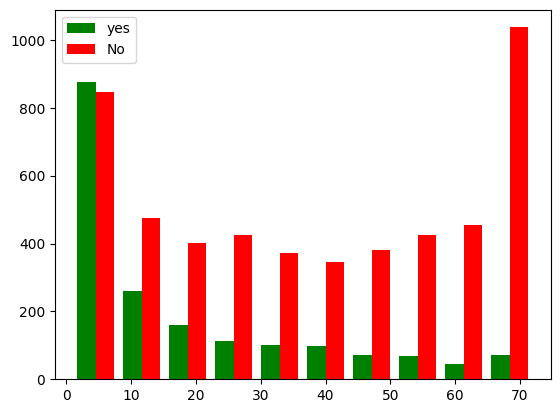

In [ ]:
tenure_no = dp[dp.Churn=='No'].tenure
tenure_yes = dp[dp.Churn=='Yes'].tenure
plt.hist([tenure_yes,tenure_no],color = ['green','red'],label = ['yes','No'])
plt.legend()

In [ ]:
for column in dp:
  if dp[column].dtype=='object':
    print(f'{column} : {dp[column].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
dp.replace('No internet service','No',inplace = True)
dp.replace('No phone service','No',inplace = True)
columns = ['Partner','Dependents','StreamingMovies','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','PaperlessBilling','Churn']
for column in columns:
  dp[column].replace({'Yes':1,'No':0},inplace = True)
dp['gender'].replace({'Female':1,'Male':0},inplace = True)
dp = pd.get_dummies(dp,columns=['InternetService','PaymentMethod','Contract'])

In [ ]:
dp.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [ ]:
for column in dp:
  print(f'{column} : {dp[column].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
InternetService_No : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_columns = ['TotalCharges','MonthlyCharges','tenure']
dp[scaled_columns] = scaler.fit_transform(dp[scaled_columns])

In [ ]:
dp.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,0,0,0,1,1,0,0
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [ ]:
X = dp.drop('Churn',axis = 'columns')
Y = dp['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size = 0.7,random_state=20)
x_train.shape
y_train.shape


(4922,)

In [ ]:
from tensorflow.keras import layers,models
model = models.Sequential()
model.add(layers.Dense(15,input_shape = (26,),activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs = 5)

Epoch 1/5
154/154 [==============================] - 1s 1ms/step - loss: 0.6350 - accuracy: 0.5996
Epoch 2/5
154/154 [==============================] - 0s 1ms/step - loss: 0.4832 - accuracy: 0.7725
Epoch 3/5
154/154 [==============================] - 0s 1ms/step - loss: 0.4424 - accuracy: 0.7887
Epoch 4/5
154/154 [==============================] - 0s 1ms/step - loss: 0.4324 - accuracy: 0.7920
Epoch 5/5
154/154 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.7952


In [ ]:
model.evaluate(x_test,y_test)

66/66 [==============================] - 0s 1ms/step - loss: 0.4214 - accuracy: 0.8005


[0.42138585448265076, 0.8004739284515381]

In [ ]:
y_pred = model.predict(x_test)
y_pred1 = []
for ele in y_pred:
  if ele>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)
y_pred[0:5]

66/66 [==============================] - 0s 905us/step


array([[0.6252293 ],
       [0.06534173],
       [0.54711497],
       [0.20656905],
       [0.03618101]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred1)

'              precision    recall  f1-score   support\n\n           0       0.85      0.88      0.87      1553\n           1       0.63      0.58      0.60       557\n\n    accuracy                           0.80      2110\n   macro avg       0.74      0.73      0.74      2110\nweighted avg       0.80      0.80      0.80      2110\n'

<Axes: >

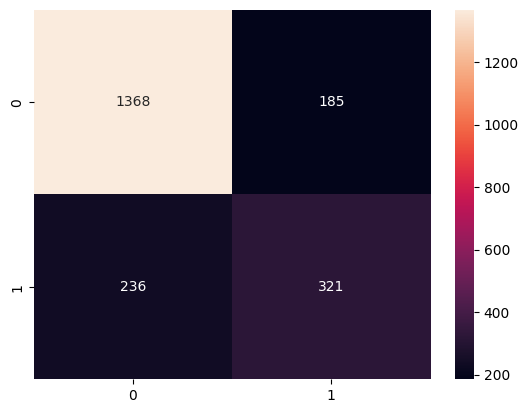

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred1)
import seaborn as sn
sn.heatmap(cm,annot = True,fmt = 'd')